In [64]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 첫 5행 출력
df.head(2)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226


In [65]:
#nan  NaN  결측치 -- 데이터 없음
# 1. 제거 - 데이터가 충분해서 해당 결측치 해당 데이터를 삭제해도 충분할때...
# 2. 대처 
    # 단순실수로 누락되어서 뻔히 어떤값인지 알수 있을때
    # 결측치가 전체데이터대비 적다.. 대략 15% 미만이고. 데이터가적어서 살려야 할때 - 평균,표준편차,빈도수 등 다양하게 채움
    # 보간기법이라고 함--> 자체 머신러닝을 이용해서 해당 부분의 값을 예측

In [66]:
# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()
df.head(2)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226


In [67]:
# 한글 폰트설정
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

<Axes: >

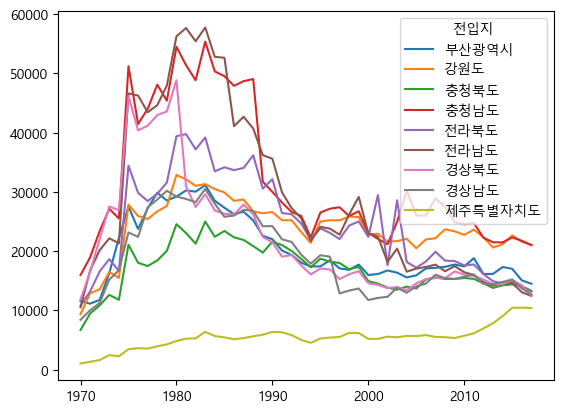

In [68]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')
df_seoul = df_seoul.drop(index=['전국'])
df_seoul.T.drop(columns=['경기도']).plot()

<Axes: >

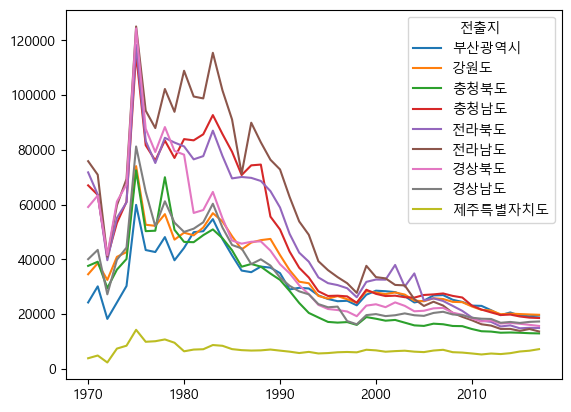

In [69]:
# 다른 지역에서 서울로 이동한 데이터
mask = (df['전출지별'] != '서울특별시') & (df['전입지별'] == '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(columns=['전입지별'])
df_seoul = df_seoul.rename(columns={'전출지별':'전출지'})
df_seoul = df_seoul.set_index('전출지')
df_seoul = df_seoul.drop(index=['전국'])
# 시각화
df_seoul.T.drop(columns=['경기도']).plot()
# df_seoul.plot()

In [70]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970     95388
1971     95423
1972     90470
1973    107177
1974    107518
Name: 경기도, dtype: object

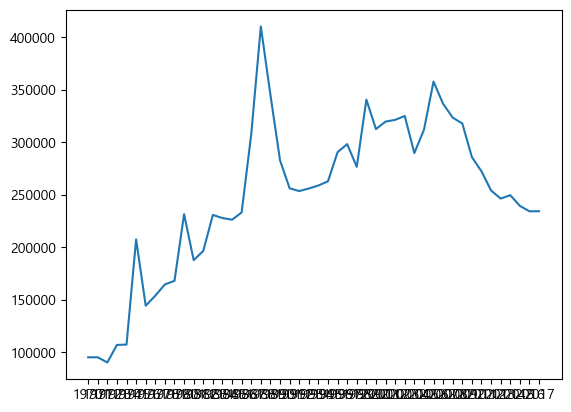

In [71]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

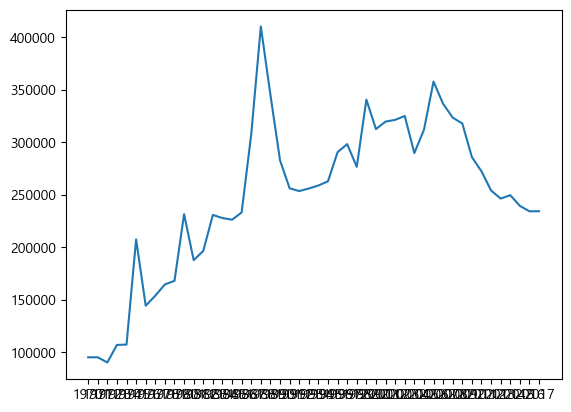

In [72]:
# 판다스 객체를 plot 함수에 입력
plt.plot(sr_one)
plt.show()

응용

In [73]:
 # https://drive.google.com/file/d/1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7/view?usp=sharing

In [74]:
%pip install pandas gdown  

Note: you may need to restart the kernel to use updated packages.


In [75]:
import gdown

file_id = '1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'credit.csv'

gdown.download(url,output,quiet=False)
df = pd.read_csv(output)
df.head()

# installments 할부개월수
# days_of_week 월요일 0  일요일 6
# holyday 1이면 공휴일 0이면 공휴일이 아님

Downloading...
From (original): https://drive.google.com/uc?id=1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7
From (redirected): https://drive.google.com/uc?id=1oxUlhFbbJqUEdAZnynTJUav5mCkM9sb7&confirm=t&uuid=4937de81-2fb6-4d57-b6e0-6748658ec876
To: c:\python_src\pandas-data-analysis\part4\credit.csv
100%|██████████| 150M/150M [00:42<00:00, 3.57MB/s] 


,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [76]:
df['datetime'] = pd.to_datetime(df.date)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,datetime,year,month
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12-14,2016,12
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016-12-14,2016,12
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12-19,2016,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12-19,2016,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12-19,2016,12


         amount
year           
2016   69385560
2017  238703895
2018  182751998


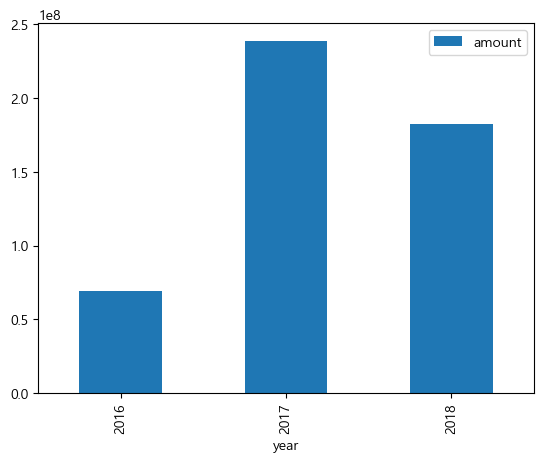

In [77]:
#연도별 신용카드 사용액
temp = df.groupby('year')[['amount']].sum()
print(temp)
ax = temp.plot(kind='bar')

In [78]:
temp.index = temp.index.astype('str')

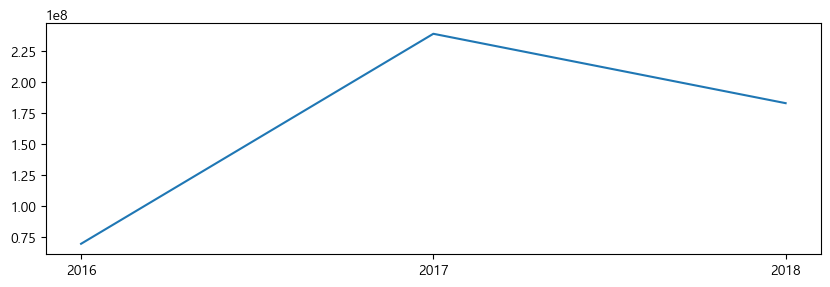

In [79]:
plt.figure(figsize=(10,3))
plt.title = '연도별 신용카드 사용액'
plt.plot(temp.index, temp.amount)
# temp.plot()
plt.show()

In [80]:
# 2017월별 신용카드 사용액